**My Python Jupyter cookbook**

For stuff that I forget.

# Python and Jupyter setup

## Finding version

In [10]:
import pandas as pd
pd.__version__

'0.20.1'

## Getting help on a function

In [13]:
# Example
pd.DataFrame.sort_values?

## Choosing the directory

In [8]:
import os

path = 'C:\\Users\\Benjamin.Lacar\\Documents\\Box\\Box Sync\\BL (Benjamin.Lacar@fluidigm.com)\\Python\\Coursera_dataScience\\ZillowHomeValues'
os.chdir(path) 
cwd = os.getcwd()
print(cwd)

C:\Users\Benjamin.Lacar\Documents\Box\Box Sync\BL (Benjamin.Lacar@fluidigm.com)\Python\Coursera_dataScience\ZillowHomeValues


## Seeing and revealing variables

In [24]:
# Check for variables
%who

NamespaceMagics	 cwd	 df	 df2	 df3	 get_ipython	 getsizeof	 json	 os	 
path	 pd	 var_dic_list	 xSSF	 


In [ ]:
# Deleting variables

# You can delete individual names with del:
del x

# Or you can remove them from the globals() object:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

## Difference between matplotlib.inline vs. matplotlib.notebook

In [3]:
% matplotlib inline
% matplotlib notebook
# the former is the older version creates new plotes, the latter is interactive

## Stopping a busy kernel

[StackOverflow entry: 'How should I stop a busy cell in an iPython notebook?'](https://stackoverflow.com/questions/36205356/how-should-i-stop-a-busy-cell-in-an-ipython-notebook)

"Click on 'Interrupt' under 'Kernel' in the toolbar. Pressing I twice will also do the trick."

## Measuring time of execution with iPython magic

- There's a distinction between running in line mode versus cell mode (%time vs. %%time). For the latter to run, it has to be the very first line of the cell.

In [47]:
%%time
x = 5
y = 6
x + y

Wall time: 0 ns


# Pandas dataframe navigation and munging

## Data frame indexing and navigation

In [42]:
%time 
# Creating a datframe from scratch
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

Wall time: 0 ns


In [11]:
# Reading a csv file into a dataframe (can also be pd.read_excel() or pd.read_table() as appropriate )
df = pd.read_csv('City_Zhvi_AllHomes.csv')

In [15]:
# Viewing the first 5 rows of a dataframe
df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,616100,622100,626700.0,630300,636800,646200,657400,670800,681000,686400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,598300,604900,609700.0,612400,616400,621800,626000,628900,630900,632000
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,210900,212800,215300.0,218200,220400,221100,221800,222400,222900,223400
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,132100,132500,133500.0,134700,135800,136500,136900,137700,138500,138900
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,201200,203200,205100.0,206600,207900,209100,210000,211800,214100,215800


In [17]:
# Viewing the last 5 rows of a dataframe
df.tail()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07
11251,398292,Town of Wrightstown,WI,Green Bay,Brown,11252,NaN,NaN,NaN,NaN,...,167500,169500,171400.0,173600,176100,177300,177100,177800,178800,179600
11252,398343,Urbana,NY,Corning,Steuben,11253,66900.0,65800.0,65500.0,65100.0,...,152700,154100,153300.0,155100,156500,153100,148100,146600,144200,140900
11253,398496,New Denmark,WI,Green Bay,Brown,11254,NaN,NaN,NaN,NaN,...,200400,202400,204900.0,207100,209200,211000,212400,213700,215300,216600
11254,398839,Angels,CA,NaN,Calaveras,11255,115600.0,116400.0,118000.0,119000.0,...,269100,273100,275500.0,276700,278100,280900,285200,287500,287100,286200
11255,737788,Lebanon Borough,NJ,New York,Hunterdon,11256,143500.0,143200.0,141700.0,140700.0,...,239900,238800,239700.0,241700,241200,238600,235100,232500,235900,241400


In [12]:
# Get a list of columns
df.columns

Index(['RegionID', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank',
       '1996-04', '1996-05', '1996-06', '1996-07',
       ...
       '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07'],
      dtype='object', length=262)

In [14]:
# Accessing a dataframe column by number and creating a new dataframe
df2 = df.iloc[:,:6]

## Data frame sorting and filtering

In [20]:
# Sorting dataframe by column(s)
df.sort_values(by=['State', 'RegionName'], ascending=True, inplace=True)

In [18]:
# Filtering the dataframe by an element in a column and creating a new dataframe
df3 = df[df['Metro']=='San Francisco']

In [19]:
# Accessing a dataframe by row index name and column index name(s)and creating a new series
xSSF = df3.loc[727, '1996-04':]

In [ ]:
# see if a pandas column contains a string
dfMetTP2['SampleID'].str.contains('NA12878')

In [25]:
### May have to re-do the following

In [21]:
# Accessing the date (re-do)
x['date'] = pd.to_datetime(x.index)

NameError: name 'x' is not defined

In [67]:
x2 = x[:-1]
x2SSF = xSSF[:-1]

# Advanced Pandas

In [ ]:
# cool pivot table example

df = pd.DataFrame({'Account_number':[1,1,2,2,2,3,3], 'Product':['A', 'A', 'A', 'B', 'B','A', 'B']})

df.pivot_table(index='Account_number', columns='Product', aggfunc=len, fill_value=0)

## Merging

In [ ]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)
# left regardless if they're in the overlap
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

## Method chaining

In [ ]:

(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

## Lambda

In [ ]:
df.apply(lambda x: np.sum(x[rows]), axis=1)

## Vector functions

other:
df.iterrows
.iterritems
zip
enumerate

## Apply function

In [ ]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

df.apply(min_max, axis=1)

## Group by

Common workflow for groupby: split data, apply function, then combine results (split, apply, combine function).
Groupby object has agg method (aggregate). This method applies a function to the column or columns of data in the group, and returns the results.

In [28]:
# Need to update table
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

FileNotFoundError: File b'census.csv' does not exist

In [ ]:
# Example to get multiple values in a groupby
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

## Link for  tips on Pandas data manipulation
This [article](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/) covers the following:
- Boolean indexing
- apply
- imputing missing files
- pivot table
- multi-indexing
- crosstab
- merging data frames
- sorting
- plotting
- cut function for binning
- coding nominal data
- iterating over rows

# Numerical series creations with numpy

In [4]:
import numpy as np
ind = np.arange(1, 5)

In [5]:
ind

array([1, 2, 3, 4])

# Plot visualization in Python

## Plotting with matplotlib

You can show matplotlib figures directly in the notebook by using the %matplotlib notebook and %matplotlib inline magic commands.
%matplotlib notebook provides an interactive environment.


In [63]:
%matplotlib notebook
# know how to get the backend and be aware of the backend layer

# Configures matplotlib to work in the browswer. It's a backend that's operating with the browser.
import matplotlib as mpl
mpl.get_backend()

# make sure we're using the nbagg backend
# access get/set layers

### Basic template and parts of a figure
http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure

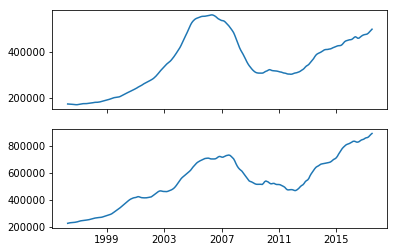

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
y=x['date']
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(y, x2)
#ax1.title('Chula Vista home values')
ax2.plot(y, xSSF)

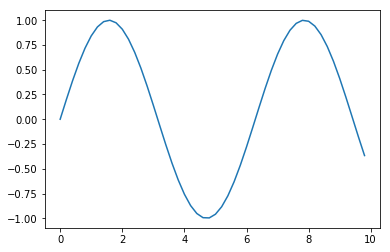

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
plt.show()

### Making a discontinuous axis
- [StackOverflow entry: "Python/Matplotlib - Is there a way to make a discontinuous axis?"](https://stackoverflow.com/questions/5656798/python-matplotlib-is-there-a-way-to-make-a-discontinuous-axis)
- [Matplotlib documentation](https://matplotlib.org/examples/pylab_examples/broken_axis.html)

### Iterating subplot axis array
- [StackOverflow entry: "matplotlib iterate subplot axis array through single list"](https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list)


### Different size subplots with gridspec

[StackOverflow entry: "Matplotlib different size subplots"](https://stackoverflow.com/questions/10388462/matplotlib-different-size-subplots)

### Adding a custom line to a plot

In [ ]:
# plot the  cutoff line
ax = plt.plot([0, 8], [0.90, 0.90], linewidth=1, linestyle='dashed', color='black', alpha=0.5)

## Plotting with Seaborn

### Seaborn factor plots

In [ ]:
sns_plot = sns.factorplot(x='IFC_no', y='PCT_READS_MAPPED_TO_GENOME', data=dfMetTP3, order=xorder, kind="box", color='#d3d3d3')   # hex value for light gray

In [ ]:
xorder = sorted(dfMetTP3['IFC_no'].unique().tolist())
sns_plot = sns.factorplot(x='IFC_no', y='PCT_READS_MAPPED_TO_GENOME', data=dfMetTP3, order=xorder, kind="box", color='#d3d3d3')   # hex value for light gray
sns_plot = sns.swarmplot(x='IFC_no', y='PCT_READS_MAPPED_TO_GENOME', data=dfMetTP3, order=xorder, alpha=1, color=F_violet, size=4) #, palette=[F_teal, F_magenta, F_purple])

# plot the  cutoff line
ax = plt.plot([0, 8], [0.90, 0.90], linewidth=1, linestyle='dashed', color='black', alpha=0.5)
sns_plot.set_xticklabels(labels = xorder, rotation=45)
plt.ylim(0.87, 1)   # matplotlib function

vals = sns_plot.axes.get_yticks()
sns_plot.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
plt.ylabel('')
plt.xlabel('')
# plt.ylabel('% Reads Mapped to Genome')
plt.title('% Reads Mapped to Genome (NA12878)')

ax = plt.gca()
ax.text(4.1, 0.894, 'spec', fontsize=10, color='black', ha='center', va='bottom')

plt.subplots_adjust(bottom=0.2, top=0.91, left=0.12, right=0.97)
sns.set(font='Proxima Nova')
sns.set_style(style='white')

# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)

# save the figure
plt.savefig('pctReadsMappedToGenome_boxplot_byIFC_wScatter.png', dpi=400)

In [ ]:
# note the workaround when x is omitted

sns_plot = sns.swarmplot(x=[""]*len(dfMetTP3), y='PCT_READS_MAPPED_TO_GENOME', hue='IFC_no', data=dfMetTP3, alpha=1, size=4, palette=F_colors) #, palette=[F_teal, F_magenta, F_purple])



In [ ]:
# plt.figure()

# XaxisData = 'TOTAL_READ'
# YaxisData ='PCT_READS_MAPPED_TO_GENOME'
# ax = dfMetTP2.plot.scatter(x=XaxisData, y=YaxisData, color=F_purple)
# fontTitle = {'fontname' : 'Montserrat'}
# font1 = {'fontname':'Proxima Nova'}
# plt.title(XaxisData.replace('_', ' ') + ' vs. ' + YaxisData.replace('_', ' '), **fontTitle)
# plt.xlabel(XaxisData.replace('_', ' '), **font1)
# plt.ylabel(YaxisData.replace('_', ' '), **font1)

# fig = ax.get_figure()
# fig.savefig(XaxisData + '_vs_' + YaxisData + '.png')

# may need to edit for now
# Plotting scatter plot with colors
# plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
# colors = [F_purple, F_magenta, F_teal] # list( F_colors[i] for i in [0, 2, 4] ) # F_colors # pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

# fig, ax = plt.subplots()
# # ax.set_color_cycle(colors)
# ax.set_prop_cycle(c=colors)
# ax.margins(0.05)
# for name, group in IFCgroup:
#     ax.plot(group.TOTAL_READ, group.PCT_READS_MAPPED_TO_GENOME, marker='o', linestyle='', ms=6, label=name)
# ax.legend(numpoints=1, loc='lower right')

# XaxisData = 'TOTAL_READ'
# YaxisData ='PCT_READS_MAPPED_TO_GENOME'

# fontTitle = {'fontname' : 'Montserrat'}
# font1 = {'fontname':'Proxima Nova'}
# plt.title(XaxisData.replace('_', ' ') + ' vs. ' + YaxisData.replace('_', ' '), **fontTitle)
# plt.xlabel(XaxisData.replace('_', ' '), **font1)
# plt.ylabel(YaxisData.replace('_', ' '), **font1)

# plt.show()

In [ ]:
### making one figure with different subplots, each with different properties from each other

# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax2 = fig.add_subplot(212)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12,4))   #  sharey, sharex determines control of sharing axes properties

#####   properties for first figure   ##########
xorder = sorted(dfMetTP3['IFCtype, no'].unique().tolist())
sns.boxplot(x='IFCtype, no', y='PCT_READS_MAPPED_TO_GENOME', data=dfMetTP3,
                          order=xorder, color='#d3d3d3', ax=ax1)   # hex value for light gray
sns.swarmplot(x='IFCtype, no', y='PCT_READS_MAPPED_TO_GENOME', data=dfMetTP3,
                         order=xorder, alpha=1, color=F_violet, size=3, ax=ax1) #, palette=[F_teal, F_magenta, F_purple])

# plot the cutoff line
ax1.plot([0, 18], [0.90, 0.90], linewidth=1, linestyle='dashed', color='black', alpha=0.5)  # works with ax1
ax1.set_xticklabels(labels = xorder, rotation=90)   # works with ax1
ax1.set_ylim(0.87, 1)  # works with ax1

# plt.ylim(0.87, 1)   # matplotlib function, doesn't work with ax1

vals = ax1.axes.get_yticks()
ax1.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])   # works with ax1
ax1.set_ylabel('')  # works with ax1
#plt.ylabel('')  # matplotlib function, doesn't work with ax1
ax1.set_xlabel('')  # works with ax1
ax1.set_title('% Reads Mapped to Genome (NA12878)')  # works with ax1

# ax = plt.gca()  # this line not needed
xvals = ax1.axes.get_xticks()
ax1.text(len(xvals)/2-0.5, 0.892, 'spec', fontsize=10, color='black', ha='center', va='bottom')

sns.boxplot(x='IFCtype, no', y='TOTAL_READ', data=dfMetTP3,
                          order=xorder, color='#d3d3d3', ax=ax2)   # hex value for light gray
sns.swarmplot(x='IFCtype, no', y='TOTAL_READ', data=dfMetTP3,
                         order=xorder, alpha=1, color=F_violet, size=3, ax=ax2) #, palette=[F_teal, F_magenta, F_purple])

ax2.set_xticklabels(labels = xorder, rotation=90)   # works with ax2
# ax2.set_ylim(0.87, 1)  # works with ax1
ax2.set_title('Total Reads (NA12878)')  # works with ax2

# plt.subplots_adjust(bottom=0.2, top=0.91, left=0.12, right=0.97)
sns.set(font='Proxima Nova')
sns.set_style(style='white')



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

% matplotlib inline

In [2]:
# set the right directory
import os
path = 'C:\\Users\\Benjamin.Lacar\\Desktop'
os.chdir(path) 
cwd = os.getcwd()
print(cwd)

C:\Users\Benjamin.Lacar\Desktop


In [67]:
y=np.linspace(0,100,100)

In [68]:
y

array([   0.        ,    1.01010101,    2.02020202,    3.03030303,
          4.04040404,    5.05050505,    6.06060606,    7.07070707,
          8.08080808,    9.09090909,   10.1010101 ,   11.11111111,
         12.12121212,   13.13131313,   14.14141414,   15.15151515,
         16.16161616,   17.17171717,   18.18181818,   19.19191919,
         20.2020202 ,   21.21212121,   22.22222222,   23.23232323,
         24.24242424,   25.25252525,   26.26262626,   27.27272727,
         28.28282828,   29.29292929,   30.3030303 ,   31.31313131,
         32.32323232,   33.33333333,   34.34343434,   35.35353535,
         36.36363636,   37.37373737,   38.38383838,   39.39393939,
         40.4040404 ,   41.41414141,   42.42424242,   43.43434343,
         44.44444444,   45.45454545,   46.46464646,   47.47474747,
         48.48484848,   49.49494949,   50.50505051,   51.51515152,
         52.52525253,   53.53535354,   54.54545455,   55.55555556,
         56.56565657,   57.57575758,   58.58585859,   59.59595

In [69]:
x = np.random.uniform(40,1000,100)


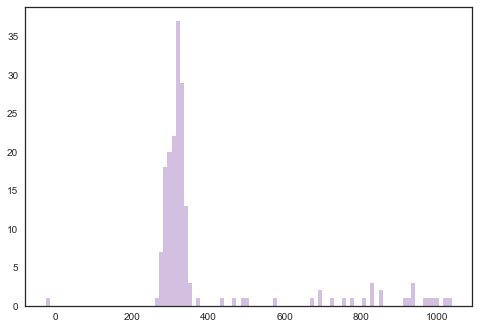

In [12]:
# generate a set of numbers that can replicate a hypothetical bioanalyzer data

#k1 = np.random.normal(loc=35.0, scale=5, size=35)   # marker 1
k2 = np.random.normal(loc=50.0, scale=10, size=0)   # primers
k3 = np.random.normal(loc=100.0, scale=10, size=0)    # primer dimers
k4 = np.random.normal(loc=300.0, scale=15, size=70)    # desired peak 1
k5 = np.random.normal(loc=325.0, scale=15, size=80)    # desired peak 2
k6 = np.random.normal(loc=600.0, scale=200, size=10)    # genomic
k7 = np.random.normal(loc=800.0, scale=200, size=10)    # genomic
k8 = np.random.normal(loc=1000.0, scale=100, size=10)    # genomic
#k9 = np.random.normal(loc=10380, scale=5, size=50)   # marker 2
kC = np.concatenate([k2, k3, k4, k5, k6, k7, k8])
# plot as a histogram
# x = np.random.normal(size=100)
ax = sns.distplot(kC, hist=True, kde=False, bins=100, hist_kws={"alpha": 0.25, "color":F_purple});
sns.set(font='Proxima Nova')
sns.set_style(style='white', )

#ax.set_xlabel('No. of bases')

# save figure
plt.savefig('Plot5_new.png', dpi=400)

In [ ]:
scipy.stats.skew(k2, )

### setting axis properties

see ax line down below
https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot


In [ ]:
ax = sns.factorplot(y='PCT_READS_MAPPED_TO_AMPLICONS_FROM_ALIGNED_READS', data=dfMetTP2, kind="box", palette=['gray'])
ax = sns.swarmplot(x=[""]*len(dfMetTP2), y='PCT_READS_MAPPED_TO_AMPLICONS_FROM_ALIGNED_READS', data=dfMetTP2, alpha=1, size=2,
              hue='IFC_no', palette=[F_teal, F_magenta, F_purple])

# plot our cutoff line
plt.plot([-.5, 0.5], [0.95, 0.95], linewidth=1, linestyle='dashed', color='black', alpha=0.5)

# for changing axes Seaborn's barplot returns an axis-object (not a figure). This means you can do the following: 
ax.set(title='% Reads Mapped to Target from Aligned Reads', ylabel='common y-label')  
plt.ylim(0.94, 1)   # matplotlib function


sns.set(font='Proxima Nova')
sns.set_style(style='white')

In [ ]:
# saving a figure
plt.savefig('pctReadsMappedToGenome_boxplot_byIFC_noScatter.png', dpi=400)

In [ ]:
# prevent saving from cutting off figure

figure.autolayout : True
    
    
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

### quickly making visuals
https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# quick boxplot check
data.boxplot(column="ApplicantIncome",by="Loan_Status")

In [ ]:
# quick histogram check
dfMetTP2_b.hist(column='PCT_READS_MAPPED_TO_GENOME', by='IFC_no')

# Statistics

### Making simulated histograms

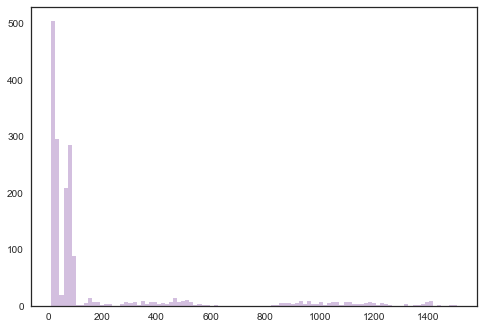

In [18]:
# generate a set of numbers that can replicate a hypothetical bioanalyzer data

#k1 = np.random.normal(loc=35.0, scale=5, size=35)   # marker 1
k2 = np.random.normal(loc=25.0, scale=5, size=800)   # primers
k3 = np.random.normal(loc=75.0, scale=10, size=300)    # primer dimers
k4 = np.random.normal(loc=150.0, scale=30, size=40)    # desired peak 1
k5 = np.random.normal(loc=300.0, scale=40, size=30)    # desired peak 2
k6 = np.random.normal(loc=400.0, scale=40, size=40)    # genomic
k7 = np.random.normal(loc=500.0, scale=40, size=50)    # genomic
k8 = np.random.normal(loc=600.0, scale=40, size=40)    # genomic
k8 = np.random.normal(loc=700.0, scale=40, size=40)    # genomic
k8 = np.random.normal(loc=800.0, scale=40, size=40)    # genomic
k8 = np.random.normal(loc=900.0, scale=40, size=40)    # genomic
k9 = np.random.normal(loc=1000, scale=40, size=30)   
k10 = np.random.normal(loc=1100, scale=40, size=30)   
k11 = np.random.normal(loc=1200, scale=40, size=30)   
k12 = np.random.normal(loc=1400, scale=40, size=30)   
kC = np.concatenate([k2, k3, k3, k4, k5, k6, k7, k8, k9, k10, k11, k12])
# plot as a histogram
# x = np.random.normal(size=100)
ax = sns.distplot(kC, hist=True, kde=False, bins=100, hist_kws={"alpha": 0.25, "color":F_purple});
sns.set(font='Proxima Nova')
sns.set_style(style='white')

#ax.set_xlabel('No. of bases')
#plt.savefig('updatedPrimerDimer_bioA.png', dpi=400)

In [ ]:
import scipy.stats as stats

statsTest = stats.f_oneway
df = dfMetTP2.copy()
colMetric = 'PCT_READS_MAPPED_TO_GENOME'
grpCol = 'IFC_no'
dfForStats = df.pivot(columns=grpCol, values=colMetric)
 
stats.f_oneway(dfForStats.iloc[:,0].dropna(), dfForStats.iloc[:,1].dropna(), dfForStats.iloc[:,2].dropna())

### Python Coursera

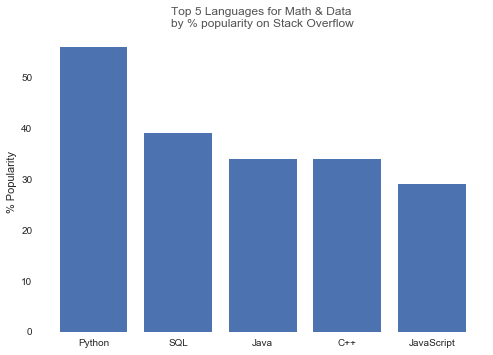

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

#TODO: remove all the ticks (both axes), and tick labels on the Y axis
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='on', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()


Spine
Spine
Spine
Spine


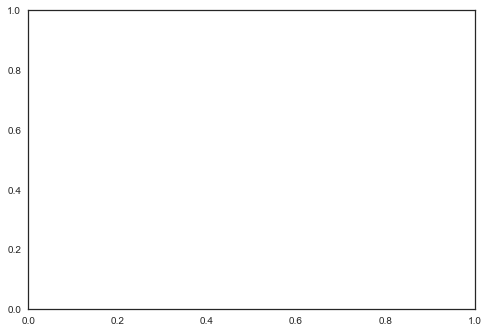

In [33]:
for spine in plt.gca().spines.values():
    print(spine)

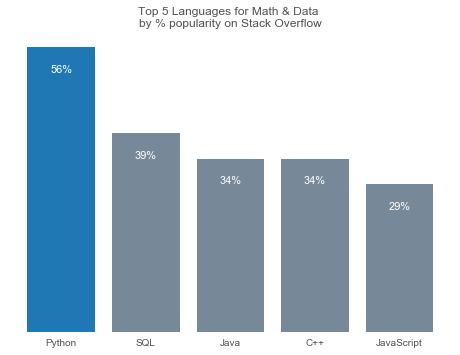

In [34]:
# dejunkified plot

import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

In [39]:
### importing HTML table into pandas
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_San_Diego_Padres_seasons'
# but this can't find the table
data = pd.read_html(url, header=0)

# remove the footers too
df_winPerc = data[1].head(49)

In [44]:
# get the salary info

url = 'http://www.baseballprospectus.com/compensation/?cyear=2017&team=SDN&pos='
# but this can't find the table
data = pd.read_html(url, header=0)

df = data[1].iloc[36:,:]
df.columns = df.iloc[0]

In [65]:
df_Payroll = df.drop(36, axis=0).drop(['PR Sort', 'Diff', 'AvgPR Sort', 'Diff Sort'], axis=1).iloc[:, :3]

In [66]:
df_Payroll.head()

36,Year,Padres payroll,Avg payroll
37,1996,"$2,000,000","$4,583,416"
38,1997,"$2,000,000","$4,892,222"
39,2000,"$53,816,000","$57,548,235"
40,2001,"$37,438,000","$67,152,893"
41,2002,"$40,678,000","$69,249,884"


In [67]:
df_winPerc.head()

,Season,Level,League,Division,Finish,Wins,Losses,Win%,GB,Postseason,Awards
0,1969,MLB,NL,West,6th,52.0,110.0,0.321,41,NaN,NaN
1,1970,MLB,NL,West,6th,63.0,99.0,0.389,39,NaN,NaN
2,1971,MLB,NL,West,6th,61.0,100.0,0.379,28½,NaN,NaN
3,1972,MLB,NL,West,6th,58.0,95.0,0.379,36½,NaN,NaN
4,1973,MLB,NL,West,6th,60.0,102.0,0.370,39,NaN,NaN


In [69]:
df_all = pd.merge(df_winPerc, df_Payroll, how='inner', left_on='Season', right_on='Year')

In [70]:
df_all.head()

,Season,Level,League,Division,Finish,Wins,Losses,Win%,GB,Postseason,Awards,Year,Padres payroll,Avg payroll
0,1996,MLB,NL,West ^,1st,91.0,71.0,0.562,—,Lost NLDS (Cardinals) 3–0,Ken Caminiti (MVP) Bruce Bochy (MOY),1996,"$2,000,000","$4,583,416"
1,1997,MLB,NL,West,4th,76.0,86.0,0.469,14,NaN,NaN,1997,"$2,000,000","$4,892,222"
2,2000,MLB,NL,West,5th,76.0,86.0,0.469,21,NaN,NaN,2000,"$53,816,000","$57,548,235"
3,2001,MLB,NL,West,4th,79.0,83.0,0.488,13,NaN,NaN,2001,"$37,438,000","$67,152,893"
4,2002,MLB,NL,West,5th,66.0,96.0,0.407,32,NaN,NaN,2002,"$40,678,000","$69,249,884"


In [77]:

# convert currencies to float
df_all['Padres payroll'] = df_all['Padres payroll'].str.replace('$', '').str.replace(',','').astype(float)
df_all['Avg payroll'] = df_all['Avg payroll'].str.replace('$', '').str.replace(',','').astype(float)


In [78]:
df_all['Padres Payroll % of MLB average'] = df_all['Padres payroll']/df_all['Avg payroll']

In [86]:
# start at 2000s to since no data is available for 1998, 1999
df_all = df_all.iloc[2:,:]

In [89]:
df_all['Season'] = pd.to_datetime(df_all['Season'])

C:\Users\Benjamin.Lacar\AppData\Local\Continuum\Anaconda3_v440\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
df_all.set_index('Season', inplace=True)

In [97]:
df_all.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01'],
              dtype='datetime64[ns]', name='Season', freq=None)

In [207]:
df_all

,Level,League,Division,Finish,Wins,Losses,Win%,GB,Postseason,Awards,Year,Padres payroll,Avg payroll,Padres Payroll % of MLB average
Season,,,,,,,,,,,,,,
2000-01-01,MLB,NL,West,5th,76.0,86.0,0.469,21,NaN,NaN,2000,53816000.0,57548235.0,0.935146
2001-01-01,MLB,NL,West,4th,79.0,83.0,0.488,13,NaN,NaN,2001,37438000.0,67152893.0,0.557504
2002-01-01,MLB,NL,West,5th,66.0,96.0,0.407,32,NaN,NaN,2002,40678000.0,69249884.0,0.587409
2003-01-01,MLB,NL,West,5th,64.0,98.0,0.395,36½,NaN,NaN,2003,43565000.0,72210211.0,0.603308
2004-01-01,MLB,NL,West,3rd,87.0,75.0,0.537,6,NaN,NaN,2004,59172333.0,71437964.0,0.828304
2005-01-01,MLB,NL,West ^,1st,82.0,80.0,0.506,—,Lost NLDS (Cardinals) 3–0,NaN,2005,62186333.0,73700583.0,0.843770
2006-01-01,MLB,NL,West ^,1st,88.0,74.0,0.543,—,Lost NLDS (Cardinals) 3–1,NaN,2006,69170167.0,81320418.0,0.850588
2007-01-01,MLB,NL,West,3rd,89.0,74.0,0.546,1½,NaN,Jake Peavy (CYA),2007,58571067.0,85813074.0,0.682542
2008-01-01,MLB,NL,West,5th,63.0,99.0,0.389,21,NaN,NaN,2008,74010117.0,93345041.0,0.792866


In [208]:
import os
path = 'C:\\Users\\Benjamin.Lacar\\Documents\\Box\\Box Sync\\BL (Benjamin.Lacar@fluidigm.com)\\Python\\Coursera_dataScience\\course2_downloads\\week4'
os.chdir(path) 
cwd = os.getcwd()
print(cwd)

C:\Users\Benjamin.Lacar\Documents\Box\Box Sync\BL (Benjamin.Lacar@fluidigm.com)\Python\Coursera_dataScience\course2_downloads\week4


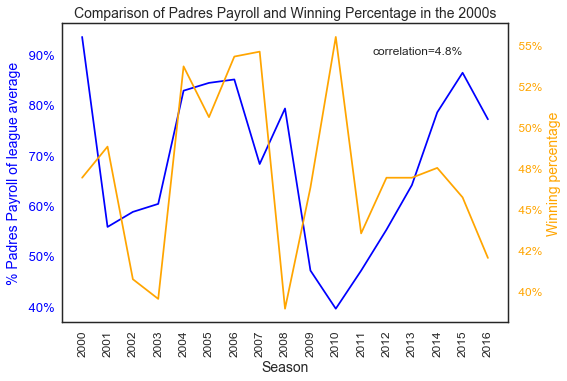

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('white')
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

fig, ax = plt.subplots()

ax.plot(df_all['Padres Payroll % of MLB average'], color='blue')
ax2 =ax.twinx()
ax2.plot(df_all['Win%'], color='orange')

# add correlation coefficient
cc = df_all[['Win%', 'Padres Payroll % of MLB average']].corr(method='pearson', min_periods=1).iloc[0,1];

ax.text(ax.get_xticks()[-1], ax.get_yticks()[-2], 'correlation='+str("%.1f" % (100*cc))+'%', ha='right');


# change left y-axis to percentage and make blue
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals], color='blue', size=13);
ax.set_ylabel('% Padres Payroll of league average', size=14)
ax.yaxis.label.set_color('blue')

# change right y-axis to percentage and make orange
vals = ax2.get_yticks();
ax2.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals], color='orange', size=12);
ax2.set_ylabel('Winning percentage', size=14)
ax2.yaxis.label.set_color('orange')

# edit title and xlabel
ax.set_xlabel('Season', size=14)
ax.set_title('Comparison of Padres Payroll and Winning Percentage in the 2000s', size=14)

# change years to show all and rotate
ax.set_xticks(df_all.index);
ax.set_xticklabels(df_all.index.year, size=12, rotation=90);


plt.savefig('pctPadresPayroll_pctWinning.png', dpi=400)

In [171]:
df_all[['Win%', 'Padres Payroll % of MLB average']].corr(method='pearson', min_periods=1).iloc[0,1]

0.048123323911428026

In [212]:
df_all.loc['Win%'].corr(df_all['Padres Payroll % of MLB average'])

0.048123323911428012

In [219]:
df_all.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01'],
              dtype='datetime64[ns]', name='Season', freq=None)

In [221]:
df_all.loc[:'2007-01-01','Win%'].corr(df_all.loc[:'2007-01-01','Padres Payroll % of MLB average'])

0.50195481219779436

In [ ]:
# trying with jsp

import pandas as pd
url = 'http://sandiego.padres.mlb.com/sd/history/year_by_year_results.jsp'
# but this can't find the table
pd.read_html(url)

# try beautiful soup and requests
from bs4 import BeautifulSoup
import re
import urllib.request
import requests

page = urllib.request.urlopen(url).read()
soup = BeautifulSoup(page)

In [8]:
pd.read_html(requests.get(url).text)

ValueError: No tables found